## Challenge

Let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. 

Data source: https://www.kaggle.com/ronitf/heart-disease-uci/download

https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
heart_df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\heart.csv')

In [5]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### random tree
(defaults)
criterion = (gini)
splitter = (best)
max_depth = (none)
min_samples_split = (2)
min_samples_leaf = (1)
min_weight_fraction_leaf = (0)
max_features = (none)
random_state = (none)


In [19]:
from sklearn import metrics

import timeit
from datetime import timedelta


start = timeit.default_timer()

dtc = tree.DecisionTreeClassifier()

X = heart_df.drop('target', 1)
Y = heart_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)


print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Cross Validation Score:',cross_val_score(dtc, X, Y, cv=10))

stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in {}".format(execution_time))

Accuracy: 0.7236842105263158
Cross Validation Score: [0.77419355 0.83870968 0.87096774 0.87096774 0.77419355 0.8
 0.7        0.73333333 0.75862069 0.79310345]
Program Executed in 0.05076029999872844


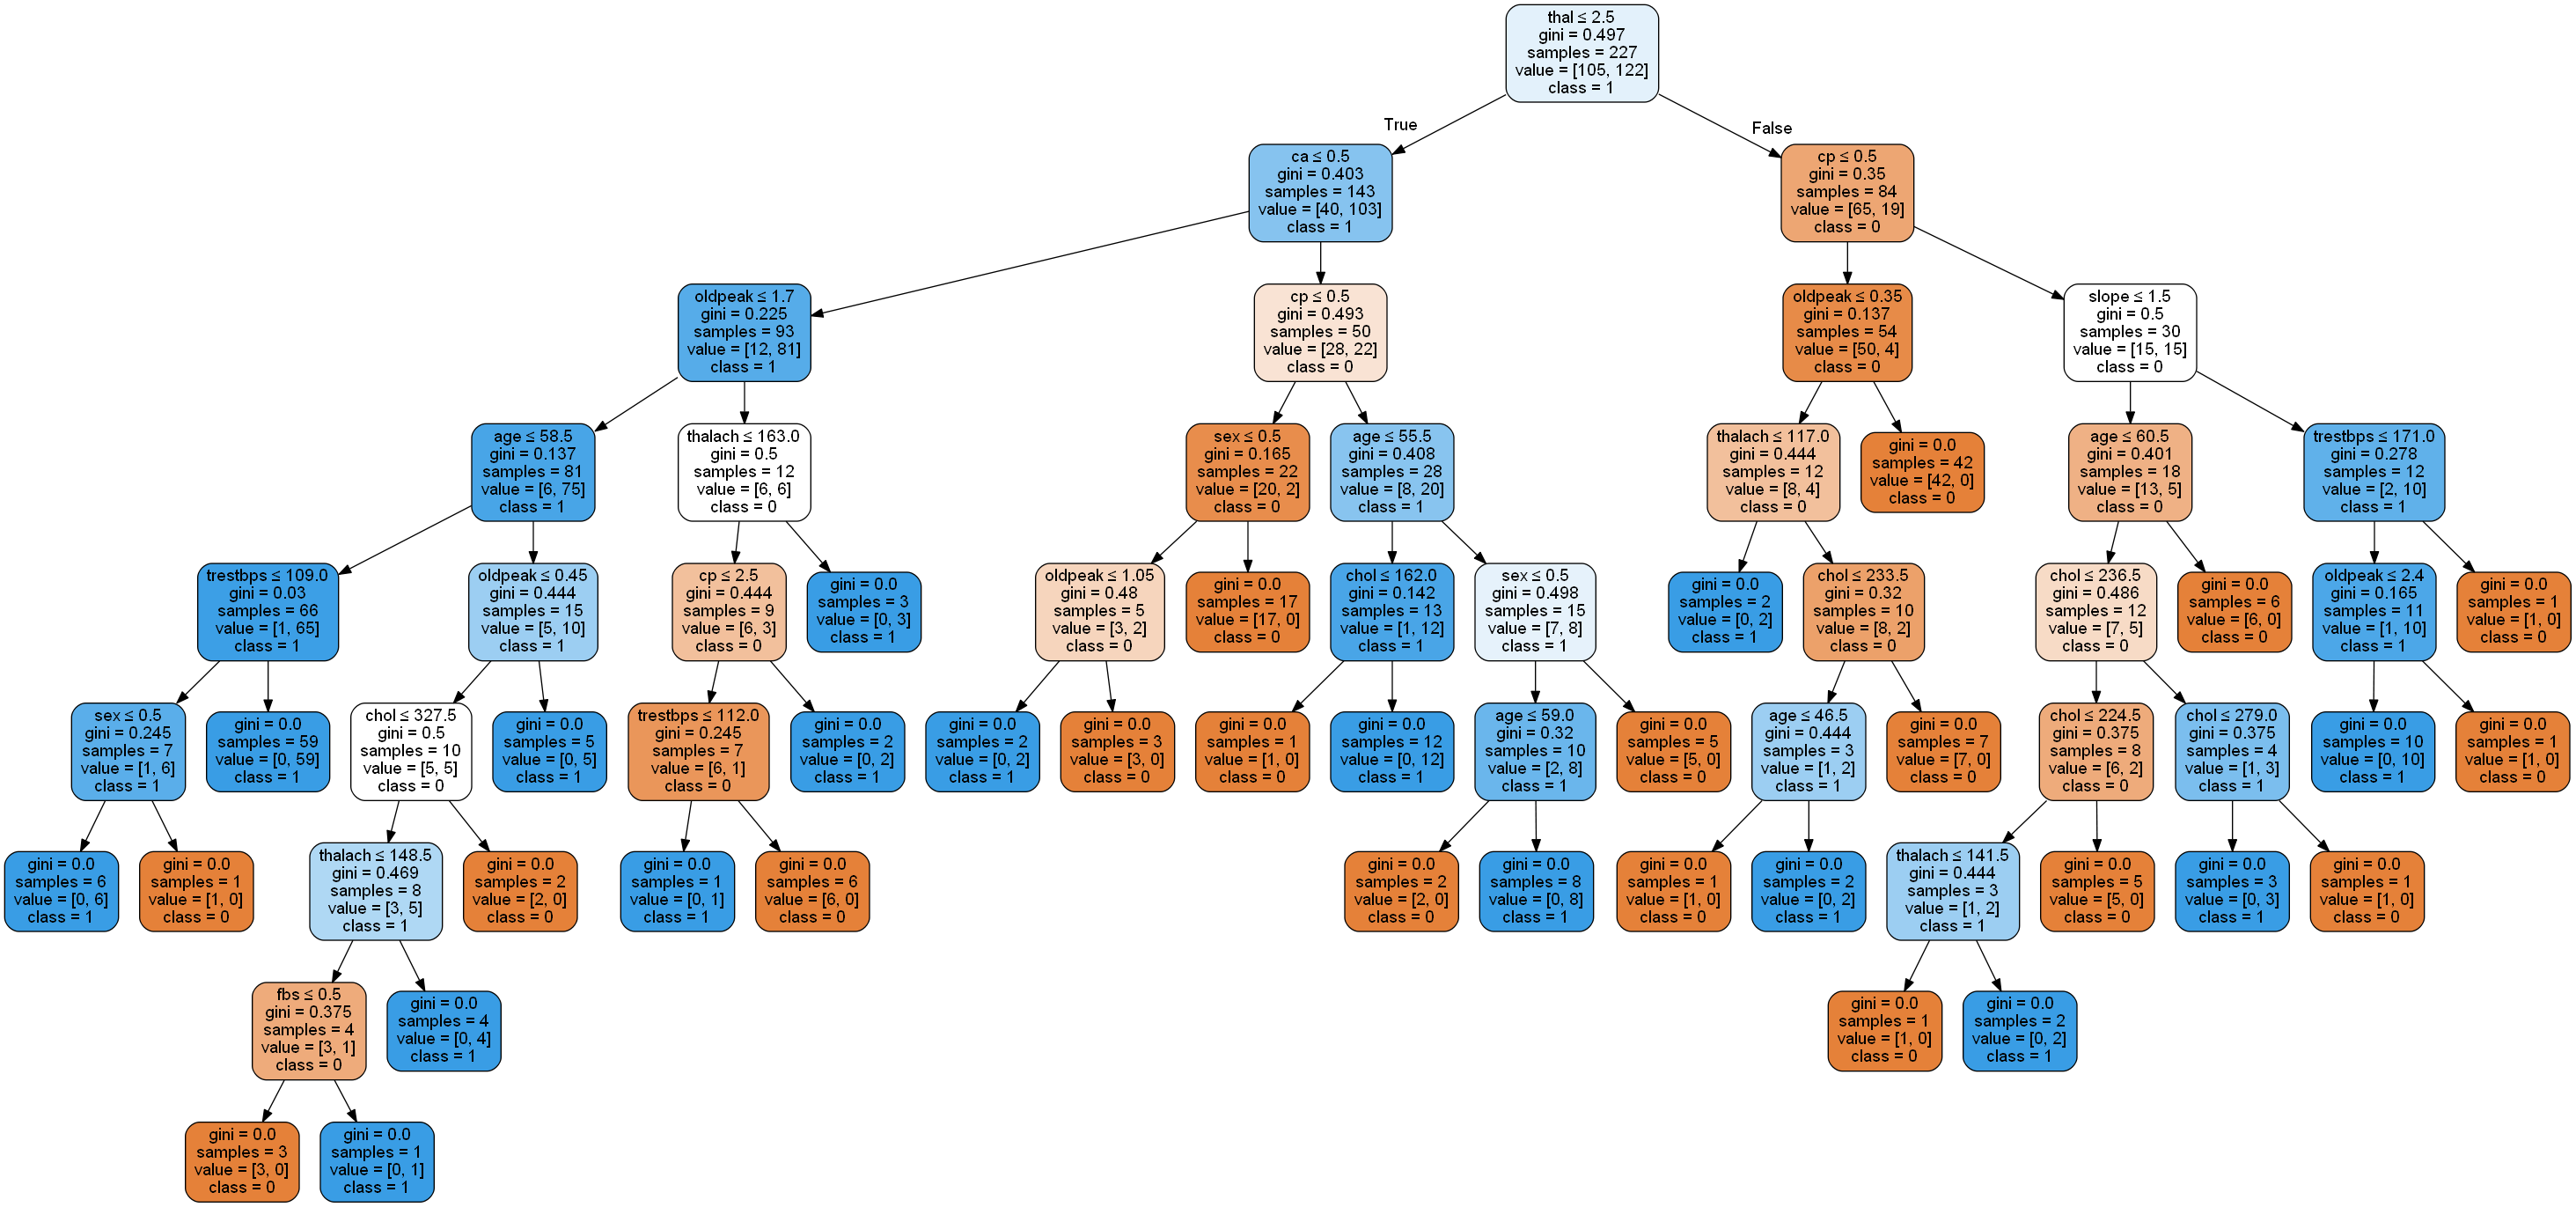

In [9]:
# visualize
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### random forest

In [20]:
start = timeit.default_timer()


rfc = ensemble.RandomForestClassifier()

X = heart_df.drop('target', 1)
Y = heart_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)



print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))
print('Cross Validation Score:',cross_val_score(rfc, X, Y, cv=10))

stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in {}".format(execution_time))

Accuracy: 0.8552631578947368
Cross Validation Score: [0.87096774 0.90322581 0.90322581 0.83870968 0.80645161 0.7
 0.7        0.86666667 0.72413793 0.75862069]
Program Executed in 0.11988779999956023


C:\Users\katec\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
